# Business Understanding
### Customer churn is a big problem for telecommunications companies. Indeed, their annual churn rates are usually higher than 10%. For that reason, they develop strategies to keep as many clients as possible. This is a classification project since the variable to be predicted is binary (churn or loyal customer). The goal here is to model churn probability, conditioned on the customer features.

# ![image.png](attachment:image.png)

## Data Acquisition


In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# DataFrame Preparation
df=pd.read_csv(r"C:\Users\abhil\Downloads\Model_deployment\telecommunications_churn (1).csv")

## EDA

In [3]:
# Checking first 10 Rows
df.head(10)

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,45.07,99,16.78,91,11.01,3,2.70,75.56,0
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,27.47,103,16.62,103,11.45,3,3.70,59.24,0
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,41.38,110,10.30,104,7.32,5,3.29,62.29,0
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,50.90,88,5.26,89,8.86,7,1.78,66.80,0
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,28.34,122,12.61,121,8.41,3,2.73,52.09,0
5,118,0,0,223.4,220.6,203.9,6.3,0,1,98,37.98,101,18.75,118,9.18,6,1.70,67.61,0
6,121,1,24,218.2,348.5,212.6,7.5,3,0,88,37.09,108,29.62,118,9.57,7,2.03,78.31,0
7,147,0,0,157.0,103.1,211.8,7.1,0,1,79,26.69,94,8.76,96,9.53,6,1.92,46.90,0
8,117,0,0,184.5,351.6,215.8,8.7,1,0,97,31.37,80,29.89,90,9.71,4,2.35,73.32,0
9,141,1,37,258.6,222.0,326.4,11.2,0,1,84,43.96,111,18.87,97,14.69,5,3.02,80.54,0


In [4]:
df.shape

(3333, 19)

In [5]:
df.describe()

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,0.276628,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,0.096910,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,59.449754,0.144914
std,39.822106,0.447398,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,0.295879,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,10.502261,0.352067
min,1.000000,0.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,22.930000,0.000000
25%,74.000000,0.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,0.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,52.380000,0.000000
50%,101.000000,0.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,0.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,59.470000,0.000000
75%,127.000000,1.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,0.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,66.480000,0.000000
max,243.000000,1.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,1.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,96.150000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          3333 non-null   int64  
 1   voice_mail_plan         3333 non-null   int64  
 2   voice_mail_messages     3333 non-null   int64  
 3   day_mins                3333 non-null   float64
 4   evening_mins            3333 non-null   float64
 5   night_mins              3333 non-null   float64
 6   international_mins      3333 non-null   float64
 7   customer_service_calls  3333 non-null   int64  
 8   international_plan      3333 non-null   int64  
 9   day_calls               3333 non-null   int64  
 10  day_charge              3333 non-null   float64
 11  evening_calls           3333 non-null   int64  
 12  evening_charge          3333 non-null   float64
 13  night_calls             3333 non-null   int64  
 14  night_charge            3333 non-null   

In [7]:
# Checking for Duplicates
df.duplicated().sum()

0

In [8]:
# Checking Data Size
df.size

63327

In [9]:
# Checking for Null Values
df.isnull().sum()

account_length            0
voice_mail_plan           0
voice_mail_messages       0
day_mins                  0
evening_mins              0
night_mins                0
international_mins        0
customer_service_calls    0
international_plan        0
day_calls                 0
day_charge                0
evening_calls             0
evening_charge            0
night_calls               0
night_charge              0
international_calls       0
international_charge      0
total_charge              0
churn                     0
dtype: int64

<AxesSubplot: >

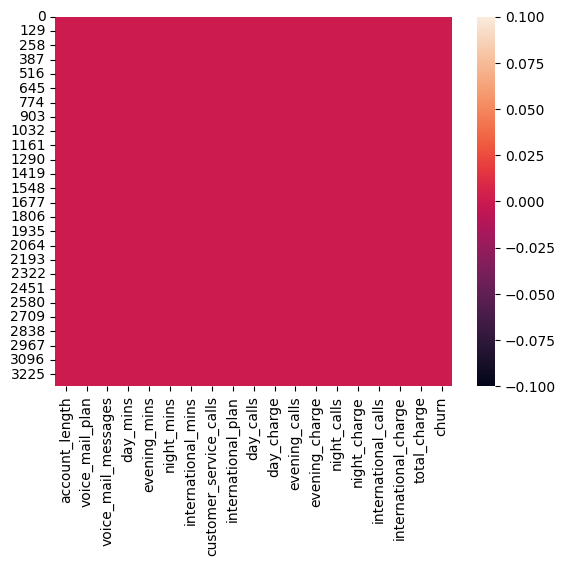

In [10]:
# Plotting heatmap for Null Values
sns.heatmap(df.isnull())

In [11]:
col=df.columns

In [12]:
col

Index(['account_length', 'voice_mail_plan', 'voice_mail_messages', 'day_mins',
       'evening_mins', 'night_mins', 'international_mins',
       'customer_service_calls', 'international_plan', 'day_calls',
       'day_charge', 'evening_calls', 'evening_charge', 'night_calls',
       'night_charge', 'international_calls', 'international_charge',
       'total_charge', 'churn'],
      dtype='object')

In [13]:
# Plotting Distplot and Histplot for checking data Distribution.
#columns=['account_length', 'voice_mail_plan', 'voice_mail_messages', 'day_mins',
#       'evening_mins', 'night_mins', 'international_mins',
#       'customer_service_calls', 'international_plan', 'day_calls',
#       'day_charge', 'evening_calls', 'evening_charge', 'night_calls',
#       'night_charge', 'international_calls', 'international_charge',
#       'total_charge', 'churn']
#for col in columns:
#    sns.displot(x=df[col],kde=True)

In [14]:
# Checking for Skewness in Dataset
df.skew().sort_values(ascending=True)

international_charge     -0.245287
international_mins       -0.245136
day_calls                -0.111787
evening_calls            -0.055563
total_charge             -0.034791
day_charge               -0.029083
day_mins                 -0.029077
evening_mins             -0.023877
evening_charge           -0.023858
night_charge              0.008886
night_mins                0.008921
night_calls               0.032500
account_length            0.096606
voice_mail_plan           0.999140
customer_service_calls    1.091359
voice_mail_messages       1.264824
international_calls       1.321478
churn                     2.018356
international_plan        2.726332
dtype: float64

### International_charge  and international_mins has Negative Skewness 
### Voice_mail_plan, customer_service_calls, voice_mail_messages, international_calls, churn and international_plan has Positive Skewness

In [15]:
# Checking for Kurtosis in Dataset
df.kurtosis().sort_values(ascending=True)

voice_mail_plan          -1.002322
account_length           -0.107836
night_calls              -0.072020
voice_mail_messages      -0.051129
day_mins                 -0.019940
day_charge               -0.019812
evening_charge            0.025487
evening_mins              0.025630
total_charge              0.047893
night_charge              0.085663
night_mins                0.085816
evening_calls             0.206156
day_calls                 0.243182
international_mins        0.609185
international_charge      0.609610
customer_service_calls    1.730914
churn                     2.075006
international_calls       3.083589
international_plan        5.436146
dtype: float64

### Voice_mail_plan has Negative Kurtosis
### Day_calls, international_mins, international_charge, customer_service_calls, churn, international_calls, international_plan has Positive Kurtosis

In [16]:
## Checking for Correlation in Dataset
df.corr()

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
account_length,1.000000,0.002918,-0.004628,0.006216,-0.006757,-0.008955,0.009514,-0.003796,0.024735,0.038470,0.006214,0.019260,-0.006745,-0.013176,-0.008960,0.020661,0.009546,0.001454,0.016541
voice_mail_plan,0.002918,1.000000,0.956927,-0.001684,0.021545,0.006079,-0.001318,-0.017824,0.006006,-0.011086,-0.001686,-0.006444,0.021559,0.015553,0.006064,0.007618,-0.001276,0.008585,-0.102148
voice_mail_messages,-0.004628,0.956927,1.000000,0.000778,0.017562,0.007681,0.002856,-0.013263,0.008745,-0.009548,0.000776,-0.005864,0.017578,0.007123,0.007663,0.013957,0.002884,0.009766,-0.089728
day_mins,0.006216,-0.001684,0.000778,1.000000,0.007043,0.004323,-0.010155,-0.013423,0.049396,0.006750,1.000000,0.015769,0.007029,0.022972,0.004300,0.008033,-0.010092,0.884754,0.205151
evening_mins,-0.006757,0.021545,0.017562,0.007043,1.000000,-0.012584,-0.011035,-0.012985,0.019100,-0.021451,0.007050,-0.011430,1.000000,0.007586,-0.012593,0.002541,-0.011067,0.413143,0.092796
night_mins,-0.008955,0.006079,0.007681,0.004323,-0.012584,1.000000,-0.015207,-0.009288,-0.028905,0.022938,0.004324,-0.002093,-0.012592,0.011204,0.999999,-0.012353,-0.015180,0.214257,0.035493
international_mins,0.009514,-0.001318,0.002856,-0.010155,-0.011035,-0.015207,1.000000,-0.009640,0.045871,0.021565,-0.010157,0.008703,-0.011043,-0.013605,-0.015214,0.032304,0.999993,0.054988,0.068239
customer_service_calls,-0.003796,-0.017824,-0.013263,-0.013423,-0.012985,-0.009288,-0.009640,1.000000,-0.024522,-0.018942,-0.013427,0.002423,-0.012987,-0.012802,-0.009277,-0.017561,-0.009675,-0.019873,0.208750
international_plan,0.024735,0.006006,0.008745,0.049396,0.019100,-0.028905,0.045871,-0.024522,1.000000,0.003755,0.049398,0.006114,0.019106,0.012451,-0.028913,0.017366,0.045780,0.048415,0.259852
day_calls,0.038470,-0.011086,-0.009548,0.006750,-0.021451,0.022938,0.021565,-0.018942,0.003755,1.000000,0.006753,0.006462,-0.021449,-0.019557,0.022927,0.004574,0.021666,0.003673,0.018459


In [17]:
# Box Plot for Outlier Detection.
#plt.figure(figsize=(17,17))
#labels=df.columns
#plt.boxplot(df,labels=labels,vert=False)
#plt.show()

#### Account_length has Outliers in Lower Quartile
#### Voice_mail_messages has Outliers in Upper Quartile
#### Day_mins has Outliers in Both Upper and Lower Quartile
#### Evening_mins has Outliers in Both Upper and Lower Quartile
#### Night_mins has Outliers in Both Upper and Lower Quartile
#### International_mins has Outliers in Both Upper and Lower Quartile
#### Customer_service_calls has Outliers in Upper Quartile
#### International_plan has Outliers in Upper Quartile
#### Day_calls has Outliers in Both Upper and Lower Quartile
#### Day_charge has Outliers in Both Upper and Lower Quartile
#### Evening_calls has Outliers in Both Upper and Lower Quartile
#### Evening_charge has Outliers in Both Upper and Lower Quartile
#### Customer_service_calls has Outliers in Upper Quartile
#### Night_calls has Outliers in Both Upper and Lower Quartile
#### Night_charge has Outliers in Both Upper and Lower Quartile
#### International_calls has Outliers in Upper Quartile
#### International_charge has Outliers in Both Upper and Lower Quartile
#### Total_charge has Outliers in Both Upper and Lower Quartile

In [18]:
#Checking churn count
df.churn.value_counts()

0    2850
1     483
Name: churn, dtype: int64

In [19]:
# plotting Chrun and Non Churn
#plt.pie(df['churn'].value_counts(), autopct='%1.1f%%')
#plt.show()

In [20]:
df['account_length'].value_counts()

105    43
87     42
101    40
93     40
90     39
       ..
243     1
200     1
232     1
5       1
221     1
Name: account_length, Length: 212, dtype: int64

In [21]:
# plotting pairplot
#sns.pairplot(df, hue='churn')

<AxesSubplot: >

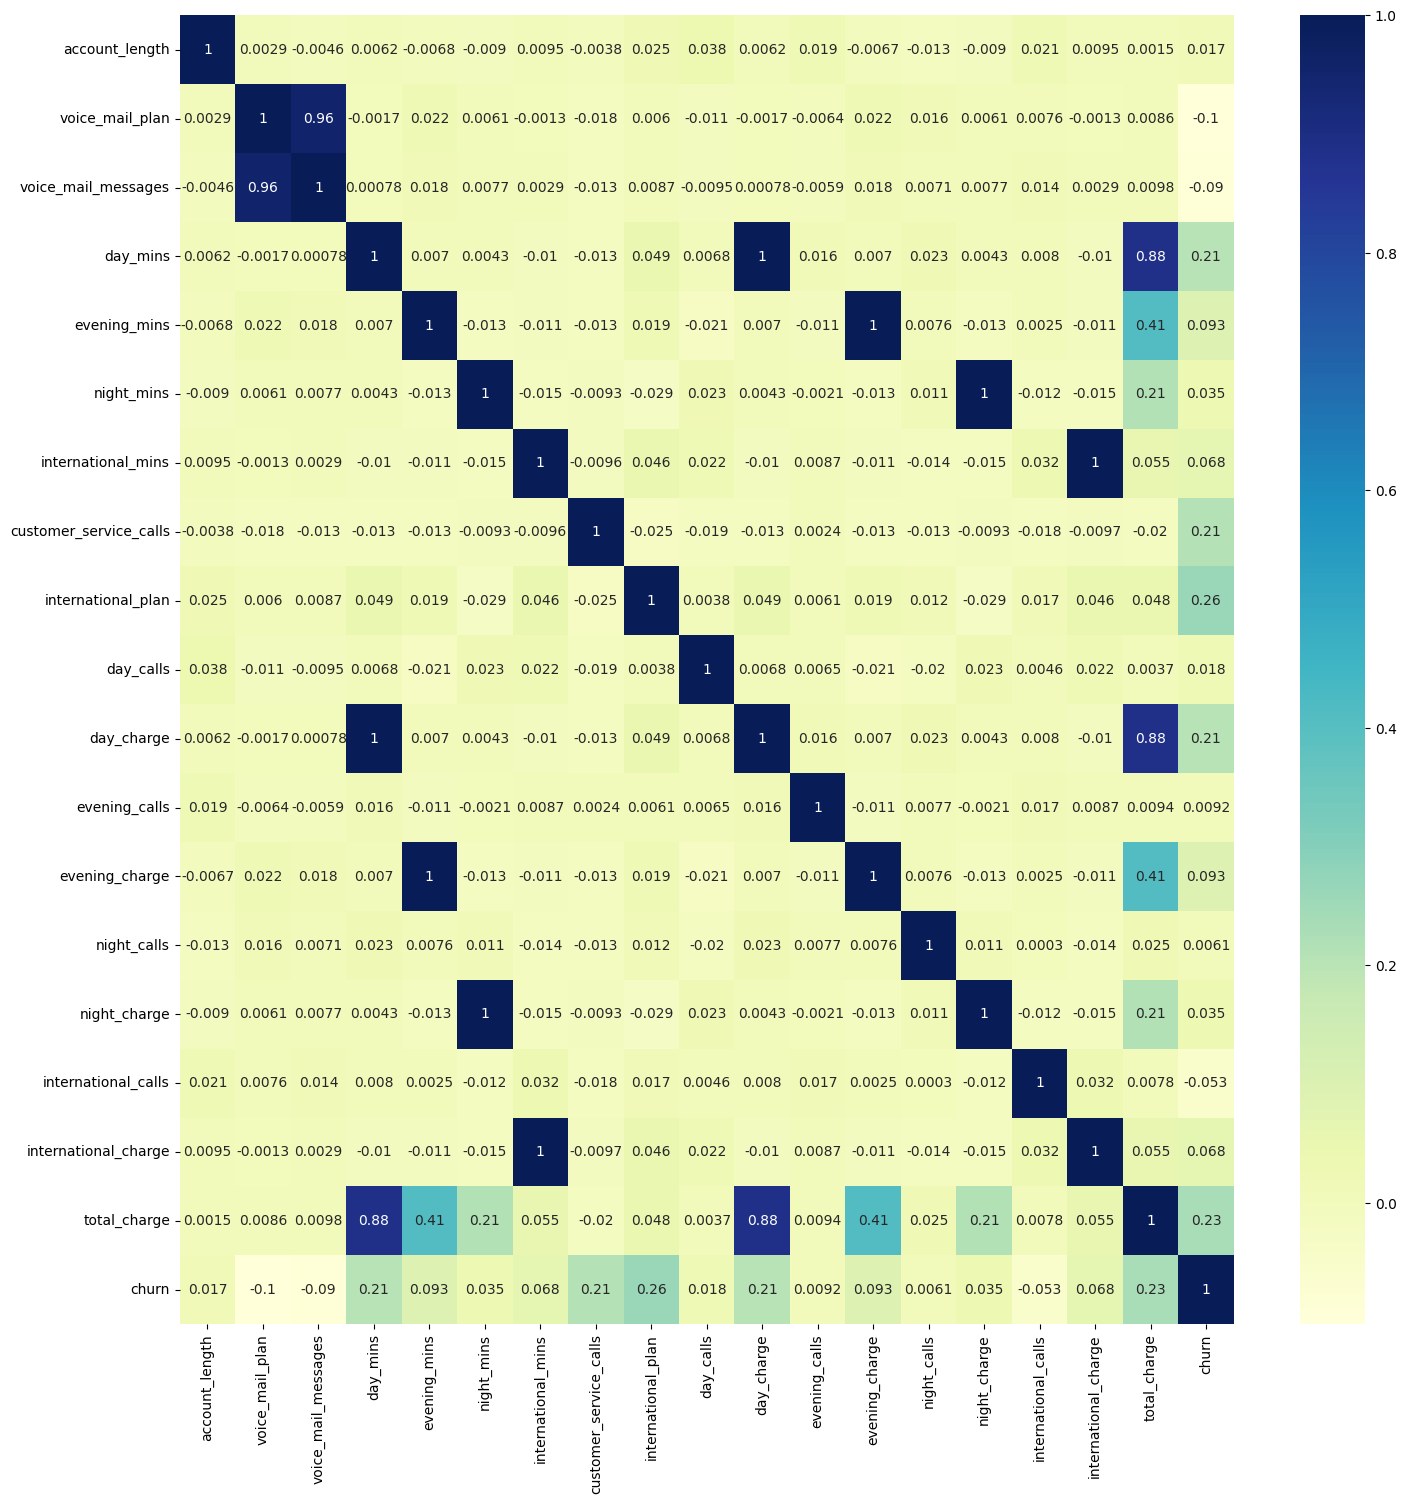

In [22]:
# Plotting a heatmap for Correlation
plt.figure(figsize=(17,17))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)


### Voice_mail_plan & voice_mail_messages has Strong Correlation
### Total Charge & Day_min, Day_Charges has a Strong Correlation
### Total Charge & Evening_min, Evening_Charges has a  Weak Correlation

In [23]:
#sns.histplot(x='account_length', data=df, hue='churn')

#### Customers with account_length account length around 50 to 150 has higher Churn

<AxesSubplot: xlabel='voice_mail_plan', ylabel='count'>

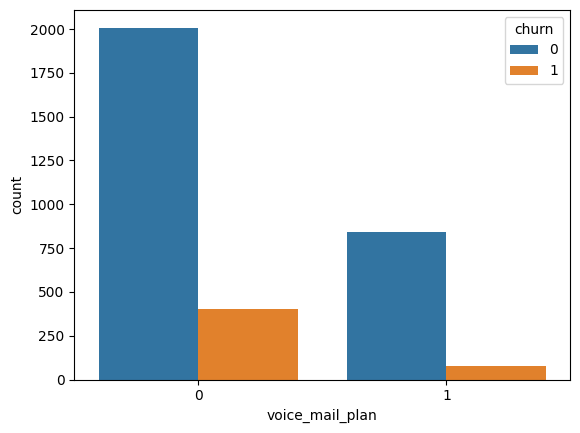

In [24]:
sns.countplot(x=df["voice_mail_plan"], hue=df['churn'])

#### Customers with No Voice_mail Plan has higher Churn 

In [25]:
#sns.histplot(x=df["voice_mail_messages"], hue=df['churn'])

#### Customers with No Voice_mail Messages has higher Churn 

In [26]:
#sns.histplot(x=df["day_mins"], hue=df['churn'])

#### Higher Churn is in found in customers with day_mins around 100 to 280

In [27]:
#sns.histplot(x=df["evening_mins"], hue=df['churn'])

#### Higher Churn is in found in customers with day_mins around 130 to 300

In [28]:
#sns.histplot(x=df["night_mins"], hue=df['churn'])

#### Higher Churn is in found in customers with Night_mins around 120 to 280

In [29]:
#sns.countplot(x=df["customer_service_calls"], hue=df['churn'])

<AxesSubplot: xlabel='international_plan', ylabel='count'>

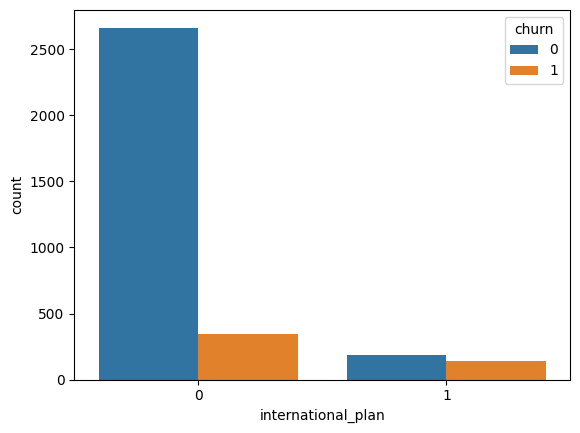

In [30]:
sns.countplot(x=df["international_plan"], hue=df['churn'])

#### Higher Churn is in found in customers with No International Plan

<AxesSubplot: xlabel='day_calls', ylabel='Count'>

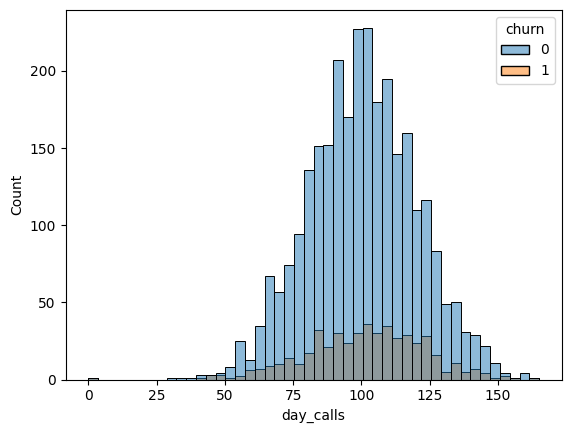

In [31]:
sns.histplot(x=df["day_calls"], hue=df['churn'])

#### Higher Churn is in found in customers with day_calls around 70 to 130

In [32]:
#sns.histplot(x=df["day_charge"], hue=df['churn'])

#### Higher Churn is in found in customers with day_charges around 15 to 50

In [33]:
#sns.histplot(x=df["evening_calls"], hue=df['churn'])

#### Higher Churn is in found in customers with Evening_Calls around 70 to 130

In [34]:
#sns.histplot(x=df["evening_charge"], hue=df['churn'])

#### Higher Churn is in found in customers with Evening_Charge around 14 to 25

In [35]:
#sns.histplot(x=df["night_calls"], hue=df['churn'])

#### Higher Churn is in found in customers with day_mins around 70 to 130

In [36]:
#sns.histplot(x=df["night_charge"], hue=df['churn'])

#### Higher Churn is in found in customers with Night_Charges around 6 to 12.5

In [37]:
#sns.histplot(x=df["international_calls"], hue=df['churn'])

#### Higher Churn is in found in customers with International_Calls around 2.5 to 6.0

In [38]:
#sns.histplot(x=df["total_charge"], hue=df['churn'])

#### Higher Churn is in found in customers with Total_Charges around 45 to 80

## Outlier Detection

### Outlier Detection can be done using following Methods
#### 1. Numeric Outlier
#### 2. Z-Score 
#### 3. DBSCAN
#### 4. Isolation Forest

### Numeric Outlier Method

#### Steps Involved
##### Calculating the IQR Range
##### Finding the Upper and lower limit

In [39]:
# Finding the IQR
percentile25 = df.quantile(0.25)
percentile75 = df.quantile(0.75)

In [40]:
# Checking Values for 75 Percentile
percentile75

account_length            127.00
voice_mail_plan             1.00
voice_mail_messages        20.00
day_mins                  216.40
evening_mins              235.30
night_mins                235.30
international_mins         12.10
customer_service_calls      2.00
international_plan          0.00
day_calls                 114.00
day_charge                 36.79
evening_calls             114.00
evening_charge             20.00
night_calls               113.00
night_charge               10.59
international_calls         6.00
international_charge        3.27
total_charge               66.48
churn                       0.00
Name: 0.75, dtype: float64

In [41]:
# Checking Values for 25 Percentile
percentile25

account_length             74.00
voice_mail_plan             0.00
voice_mail_messages         0.00
day_mins                  143.70
evening_mins              166.60
night_mins                167.00
international_mins          8.50
customer_service_calls      1.00
international_plan          0.00
day_calls                  87.00
day_charge                 24.43
evening_calls              87.00
evening_charge             14.16
night_calls                87.00
night_charge                7.52
international_calls         3.00
international_charge        2.30
total_charge               52.38
churn                       0.00
Name: 0.25, dtype: float64

In [42]:
# Calculating the IQR
iqr = percentile75 - percentile25

In [43]:
iqr

account_length            53.00
voice_mail_plan            1.00
voice_mail_messages       20.00
day_mins                  72.70
evening_mins              68.70
night_mins                68.30
international_mins         3.60
customer_service_calls     1.00
international_plan         0.00
day_calls                 27.00
day_charge                12.36
evening_calls             27.00
evening_charge             5.84
night_calls               26.00
night_charge               3.07
international_calls        3.00
international_charge       0.97
total_charge              14.10
churn                      0.00
dtype: float64

In [44]:
# Calculating the Upper and lower limit for each columns
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [45]:
# Printing Upper and Lower Limits
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit account_length            206.500
voice_mail_plan             2.500
voice_mail_messages        50.000
day_mins                  325.450
evening_mins              338.350
night_mins                337.750
international_mins         17.500
customer_service_calls      3.500
international_plan          0.000
day_calls                 154.500
day_charge                 55.330
evening_calls             154.500
evening_charge             28.760
night_calls               152.000
night_charge               15.195
international_calls        10.500
international_charge        4.725
total_charge               87.630
churn                       0.000
dtype: float64
Lower limit account_length            -5.500
voice_mail_plan           -1.500
voice_mail_messages      -30.000
day_mins                  34.650
evening_mins              63.550
night_mins                64.550
international_mins         3.100
customer_service_calls    -0.500
international_plan         0.000
day_calls         

### Finding the Outliers

#### Highest number of Outliers are found in Columns customer_service_calls, international_plan

In [46]:
# Finding the number of outliers
df[(df < lower_limit) | (df > upper_limit)].count()

account_length             18
voice_mail_plan             0
voice_mail_messages         1
day_mins                   25
evening_mins               24
night_mins                 30
international_mins         46
customer_service_calls    267
international_plan        323
day_calls                  23
day_charge                 25
evening_calls              20
evening_charge             24
night_calls                22
night_charge               30
international_calls        78
international_charge       49
total_charge               27
churn                     483
dtype: int64

In [47]:
# Finding the percentage of Outliers
(df[(df < lower_limit) | (df > upper_limit)].count())/len(df)*100

account_length             0.540054
voice_mail_plan            0.000000
voice_mail_messages        0.030003
day_mins                   0.750075
evening_mins               0.720072
night_mins                 0.900090
international_mins         1.380138
customer_service_calls     8.010801
international_plan         9.690969
day_calls                  0.690069
day_charge                 0.750075
evening_calls              0.600060
evening_charge             0.720072
night_calls                0.660066
night_charge               0.900090
international_calls        2.340234
international_charge       1.470147
total_charge               0.810081
churn                     14.491449
dtype: float64

#### Highest Percentage of Outliers are found in Columns customer_service_calls, international_plan
#### customer_service_calls, international_plan & international_mins has Contributed to around 20% of outliers in the Dataframe

### Capping the Outliers

#### Using Capping method for outlier treatment as the number of datapoints are less.
#### Deleting the Data would result in less datapoints which can result in underfitting and may produce incorrect prediction on the new datapoints

In [48]:
# Creaing a New dataframe for capping the Outliers.
new_df_cap = df.copy()
cols = ['account_length', 'voice_mail_plan', 'voice_mail_messages', 'day_mins',
       'evening_mins', 'night_mins', 'international_mins',
       'customer_service_calls', 'day_calls',
       'day_charge', 'evening_calls', 'evening_charge', 'night_calls',
       'night_charge', 'international_calls', 'international_charge',
       'total_charge']

In [49]:
def IQR_capping(new_df_cap, cols):
    for col in cols:
        percentile25 = df.quantile(0.25)
        percentile75 = df.quantile(0.75)
        iqr = percentile75 - percentile25
        upper_limit = percentile75 + 1.5 * iqr
        lower_limit = percentile25 - 1.5 * iqr
        new_df_cap[col] = np.where(new_df_cap[col] > upper_limit[col], upper_limit[col], np.where(new_df_cap[col] < lower_limit[col], lower_limit[col], new_df_cap[col]))

In [50]:
IQR_capping(new_df_cap, cols)

In [51]:
# Outlier count after capping the Obutliers.
new_df_cap[(new_df_cap>upper_limit)|(new_df_cap<lower_limit)].count()

account_length              0
voice_mail_plan             0
voice_mail_messages         0
day_mins                    0
evening_mins                0
night_mins                  0
international_mins          0
customer_service_calls      0
international_plan        323
day_calls                   0
day_charge                  0
evening_calls               0
evening_charge              0
night_calls                 0
night_charge                0
international_calls         0
international_charge        0
total_charge                0
churn                     483
dtype: int64

In [52]:
new_df_cap.describe()

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.003300,0.276628,8.098710,179.816157,201.009541,200.828143,10.254575,1.476298,0.096910,100.473597,30.569292,100.134113,17.086016,100.098410,9.037381,4.424842,2.769320,59.455509,0.144914
std,39.644112,0.447398,13.687436,54.152190,50.401365,50.118622,2.721007,1.107194,0.295879,19.863740,9.205865,19.758567,4.284135,19.443717,2.255212,2.272343,0.734445,10.431164,0.352067
min,1.000000,0.000000,0.000000,34.650000,63.550000,64.550000,3.100000,0.000000,0.000000,46.500000,5.890000,46.500000,5.400000,48.000000,2.915000,0.000000,0.845000,31.230000,0.000000
25%,74.000000,0.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,0.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,52.380000,0.000000
50%,101.000000,0.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,0.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,59.470000,0.000000
75%,127.000000,1.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,0.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,66.480000,0.000000
max,206.500000,1.000000,50.000000,325.450000,338.350000,337.750000,17.500000,3.500000,1.000000,154.500000,55.330000,154.500000,28.760000,152.000000,15.195000,10.500000,4.725000,87.630000,1.000000


In [53]:
# Shape of New Df
new_df_cap.shape

(3333, 19)

In [54]:
# Box Plot for Outlier Detection after treatment.
#plt.figure(figsize=(17,17))
#labels=new_df_cap.columns
#plt.boxplot(new_df_cap,labels=labels,vert=False)
#plt.show()

#### After Capping and Plotting the Boxplot we see not outliers

## Trimming

In [55]:
# Dropping the Outliers
new_df_trim = df.copy()
new_df_trim1 = new_df_trim[(new_df_trim['account_length'] < 206.500) & (new_df_trim['account_length'] >  -5.500)]
new_df_trim2= new_df_trim1[(new_df_trim1['voice_mail_plan'] < 2.500) & (new_df_trim1['voice_mail_plan'] >  -1.500)]
new_df_trim3= new_df_trim2[(new_df_trim2['voice_mail_messages'] < 50.000) & (new_df_trim2['voice_mail_messages'] >  -30.000)]
new_df_trim4= new_df_trim3[(new_df_trim3['day_mins'] < 325.450) & (new_df_trim3['day_mins'] >  34.650)]
new_df_trim5= new_df_trim4[(new_df_trim4['evening_mins'] < 338.350) & (new_df_trim4['evening_mins'] >  63.550)]
new_df_trim6= new_df_trim5[(new_df_trim5['night_mins'] < 337.750) & (new_df_trim5['night_mins'] >  64.550)]
new_df_trim7= new_df_trim6[(new_df_trim6['international_mins'] < 17.500) & (new_df_trim6['international_mins'] >  3.100)]
new_df_trim8= new_df_trim7[(new_df_trim7['customer_service_calls'] < 3.500) & (new_df_trim7['customer_service_calls'] > -0.500)]
new_df_trim_10 = new_df_trim8[(new_df_trim8['day_calls'] < 154.500) & (new_df_trim8['day_calls'] >  46.500)]
new_df_trim_11 = new_df_trim_10[(new_df_trim_10['day_charge'] < 55.330) & (new_df_trim_10['day_charge'] >  5.890)]
new_df_trim_12 = new_df_trim_11[(new_df_trim_11['evening_calls'] < 154.500) & (new_df_trim_11['evening_calls'] >  46.500)]
new_df_trim_13 = new_df_trim_12[(new_df_trim_12['evening_charge'] < 28.760) & (new_df_trim_12['evening_charge'] >  5.400)]
new_df_trim_14 = new_df_trim_13[(new_df_trim_13['night_calls'] < 152.000) & (new_df_trim_13['night_calls'] >  48.000)]
new_df_trim_16 = new_df_trim_14[(new_df_trim_14['night_charge'] < 15.195) & (new_df_trim_14['night_charge'] >  2.915)]
new_df_trim_17 = new_df_trim_16[(new_df_trim_16['international_calls'] < 10.500) & (new_df_trim_16['international_calls'] > -1.500)]
new_df_trim_18 = new_df_trim_17[(new_df_trim_17['international_charge'] < 4.725) & (new_df_trim_17['international_charge'] > 0.845)]
new_df_trim_final = new_df_trim_18[(new_df_trim_18['total_charge'] < 87.630) & (new_df_trim_18['total_charge'] >  31.230)] 

In [56]:
new_df_trim_final.shape

(2790, 19)

### Dropping the Outliers has resulted in loss of 543 datapoints

In [57]:
new_df_trim_final

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,45.07,99,16.78,91,11.01,3,2.70,75.56,0
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,27.47,103,16.62,103,11.45,3,3.70,59.24,0
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,41.38,110,10.30,104,7.32,5,3.29,62.29,0
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,28.34,122,12.61,121,8.41,3,2.73,52.09,0
5,118,0,0,223.4,220.6,203.9,6.3,0,1,98,37.98,101,18.75,118,9.18,6,1.70,67.61,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,1,36,156.2,215.5,279.1,9.9,2,0,77,26.55,126,18.32,83,12.56,6,2.67,60.10,0
3329,68,0,0,231.1,153.4,191.3,9.6,3,0,57,39.29,55,13.04,123,8.61,4,2.59,63.53,0
3330,28,0,0,180.8,288.8,191.9,14.1,2,0,109,30.74,58,24.55,91,8.64,6,3.81,67.74,0
3331,184,0,0,213.8,159.6,139.2,5.0,2,1,105,36.35,84,13.57,137,6.26,10,1.35,57.53,0


In [58]:
new_df_trim_final['churn'].value_counts()

0    2489
1     301
Name: churn, dtype: int64

### Deletion of outliers has resulted in removal of 361 datapoints for Customers Stayed back and 182 Datapoints from Churned Customers

In [59]:
df.shape

(3333, 19)

## IsolationForest

In [60]:
df_isf = df.copy()
from sklearn.ensemble import IsolationForest
clf = IsolationForest(n_estimators=20, warm_start=True)
clf.fit(df_isf)
df_isf['scores']=clf.predict(df_isf)

<AxesSubplot: xlabel='scores', ylabel='count'>

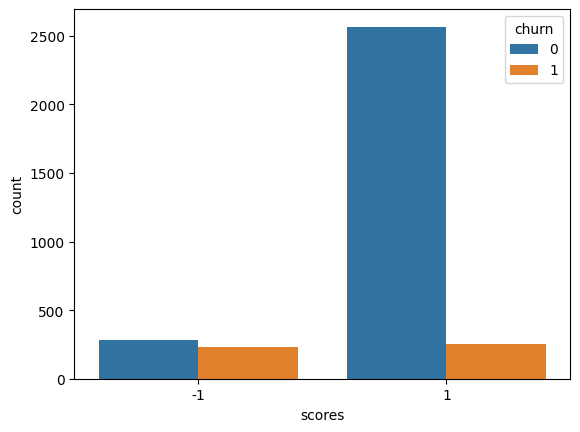

In [61]:
# 1 is not an Outlier and -1 is an outlier
sns.countplot(x='scores', data = df_isf, hue='churn')

In [62]:
# Deleting the outliers
df_new_final = df_isf[df_isf.scores != -1]

In [63]:
df_new_final.shape

(2818, 20)

In [64]:
df_new_final['churn'].value_counts()

0    2567
1     251
Name: churn, dtype: int64

#### Isolation Forest has Detected around 603 Datapoints as outliers
#### Highest Number of outliers are being detected in the Customers who have churned and deleting data using isolation forest is resulting in loss of 226 datapoints from the Churned customers.

## Z_Score

In [65]:
print("Mean value of cgpa",df.mean())
print("Std value of cgpa",df.std())
print("Min value of cgpa",df.min())
print("Max value of cgpa",df.max())

Mean value of cgpa account_length            101.064806
voice_mail_plan             0.276628
voice_mail_messages         8.099010
day_mins                  179.775098
evening_mins              200.980348
night_mins                200.872037
international_mins         10.237294
customer_service_calls      1.562856
international_plan          0.096910
day_calls                 100.435644
day_charge                 30.562307
evening_calls             100.114311
evening_charge             17.083540
night_calls               100.107711
night_charge                9.039325
international_calls         4.479448
international_charge        2.764581
total_charge               59.449754
churn                       0.144914
dtype: float64
Std value of cgpa account_length            39.822106
voice_mail_plan            0.447398
voice_mail_messages       13.688365
day_mins                  54.467389
evening_mins              50.713844
night_mins                50.573847
international_mins         2.

In [66]:
Highest_allowed = df.mean() + 3*df.std()
Lowest_allowed = df.mean() - 3*df.std()

In [67]:
Highest_allowed

account_length            220.531124
voice_mail_plan             1.618821
voice_mail_messages        49.164106
day_mins                  343.177265
evening_mins              353.121881
night_mins                352.593578
international_mins         18.612812
customer_service_calls      5.509329
international_plan          0.984547
day_calls                 160.642896
day_charge                 58.340611
evening_calls             159.882187
evening_charge             30.015543
night_calls               158.813539
night_charge               15.866943
international_calls        11.863091
international_charge        5.025899
total_charge               90.956536
churn                       1.201117
dtype: float64

In [68]:
Lowest_allowed

account_length           -18.401511
voice_mail_plan           -1.065566
voice_mail_messages      -32.966086
day_mins                  16.372930
evening_mins              48.838815
night_mins                49.150496
international_mins         1.861775
customer_service_calls    -2.383617
international_plan        -0.790728
day_calls                 40.228391
day_charge                 2.784004
evening_calls             40.346436
evening_charge             4.151537
night_calls               41.401883
night_charge               2.211706
international_calls       -2.904195
international_charge       0.503264
total_charge              27.942972
churn                     -0.911288
dtype: float64

In [69]:
# Finding Outliers
df[(df[col] > Highest_allowed[col]) | (df[col] < Lowest_allowed[col])].count()

account_length              7
voice_mail_plan             0
voice_mail_messages         3
day_mins                    9
evening_mins                9
night_mins                 11
international_mins         22
customer_service_calls     35
international_plan        323
day_calls                   9
day_charge                  9
evening_calls               7
evening_charge              9
night_calls                 6
night_charge               11
international_calls        50
international_charge       22
total_charge               11
churn                       0
dtype: int64

#### International_calls has Highest Number of Outliers

In [70]:
# Finding Outliers Percentage
df[(df[col] > Highest_allowed[col]) | (df[col] < Lowest_allowed[col])].count()*100/len(df)

account_length            0.210021
voice_mail_plan           0.000000
voice_mail_messages       0.090009
day_mins                  0.270027
evening_mins              0.270027
night_mins                0.330033
international_mins        0.660066
customer_service_calls    1.050105
international_plan        9.690969
day_calls                 0.270027
day_charge                0.270027
evening_calls             0.210021
evening_charge            0.270027
night_calls               0.180018
night_charge              0.330033
international_calls       1.500150
international_charge      0.660066
total_charge              0.330033
churn                     0.000000
dtype: float64

#### International_calls had the Highest Percentage outliers

In [71]:
df_Z_score_cap = df.copy()

In [72]:
cols = ['account_length', 'voice_mail_plan', 'voice_mail_messages', 'day_mins',
       'evening_mins', 'night_mins', 'international_mins',
       'customer_service_calls', 'day_calls',
       'day_charge', 'evening_calls', 'evening_charge', 'night_calls',
       'night_charge', 'international_calls', 'international_charge',
       'total_charge']

In [73]:
def Z_score_capping(df_Z_score_cap, cols):
    for col in cols:
        Highest_allowed = df.mean() + 3*df.std()
        Lowest_allowed = df.mean() - 3*df.std()
        df_Z_score_cap[col] = np.where(df_Z_score_cap[col] > Highest_allowed[col], Highest_allowed[col], np.where(df_Z_score_cap[col] < Lowest_allowed[col], Lowest_allowed[col], df_Z_score_cap[col]))

In [74]:
Z_score_capping(df_Z_score_cap, cols)

In [75]:
# Finding Outliers
df_Z_score_cap[(df_Z_score_cap[col] > Highest_allowed[col]) | (df_Z_score_cap[col] < Lowest_allowed[col])].count()

account_length              0
voice_mail_plan             0
voice_mail_messages         0
day_mins                    0
evening_mins                0
night_mins                  0
international_mins          0
customer_service_calls      0
international_plan        323
day_calls                   0
day_charge                  0
evening_calls               0
evening_charge              0
night_calls                 0
night_charge                0
international_calls         0
international_charge        0
total_charge                0
churn                       0
dtype: int64

## Feature Engineering

### Feature engineering refers to manipulation — addition, deletion, combination, mutation — of your data set to improve machine learning model training, leading to better performance and greater accuracy.

In [76]:
df_Z_score_cap

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
0,128.0,1.0,25.0,265.1,197.4,244.7,10.0,1.0,0,110.0,45.07,99.0,16.78,91.0,11.01,3.0,2.70,75.56,0
1,107.0,1.0,26.0,161.6,195.5,254.4,13.7,1.0,0,123.0,27.47,103.0,16.62,103.0,11.45,3.0,3.70,59.24,0
2,137.0,0.0,0.0,243.4,121.2,162.6,12.2,0.0,0,114.0,41.38,110.0,10.30,104.0,7.32,5.0,3.29,62.29,0
3,84.0,0.0,0.0,299.4,61.9,196.9,6.6,2.0,1,71.0,50.90,88.0,5.26,89.0,8.86,7.0,1.78,66.80,0
4,75.0,0.0,0.0,166.7,148.3,186.9,10.1,3.0,1,113.0,28.34,122.0,12.61,121.0,8.41,3.0,2.73,52.09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192.0,1.0,36.0,156.2,215.5,279.1,9.9,2.0,0,77.0,26.55,126.0,18.32,83.0,12.56,6.0,2.67,60.10,0
3329,68.0,0.0,0.0,231.1,153.4,191.3,9.6,3.0,0,57.0,39.29,55.0,13.04,123.0,8.61,4.0,2.59,63.53,0
3330,28.0,0.0,0.0,180.8,288.8,191.9,14.1,2.0,0,109.0,30.74,58.0,24.55,91.0,8.64,6.0,3.81,67.74,0
3331,184.0,0.0,0.0,213.8,159.6,139.2,5.0,2.0,1,105.0,36.35,84.0,13.57,137.0,6.26,10.0,1.35,57.53,0


In [77]:
# Creating a new column as Total_mins by merging day_mins, evening_mins, night_mins & international_mins
df_Z_score_cap['Total_mins'] = df_Z_score_cap['day_mins']+df_Z_score_cap['evening_mins']+df_Z_score_cap['night_mins']+df_Z_score_cap['international_mins']

In [78]:
# Creating a new column as Total_calls by merging day_calls, evening_calls, night_calls & international_calls
df_Z_score_cap['Total_calls'] = df_Z_score_cap['day_calls']+df_Z_score_cap['evening_calls']+df_Z_score_cap['night_calls']+df_Z_score_cap['international_calls']

In [79]:
df_Z_score_cap

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn,Total_mins,Total_calls
0,128.0,1.0,25.0,265.1,197.4,244.7,10.0,1.0,0,110.0,...,99.0,16.78,91.0,11.01,3.0,2.70,75.56,0,717.2,303.0
1,107.0,1.0,26.0,161.6,195.5,254.4,13.7,1.0,0,123.0,...,103.0,16.62,103.0,11.45,3.0,3.70,59.24,0,625.2,332.0
2,137.0,0.0,0.0,243.4,121.2,162.6,12.2,0.0,0,114.0,...,110.0,10.30,104.0,7.32,5.0,3.29,62.29,0,539.4,333.0
3,84.0,0.0,0.0,299.4,61.9,196.9,6.6,2.0,1,71.0,...,88.0,5.26,89.0,8.86,7.0,1.78,66.80,0,564.8,255.0
4,75.0,0.0,0.0,166.7,148.3,186.9,10.1,3.0,1,113.0,...,122.0,12.61,121.0,8.41,3.0,2.73,52.09,0,512.0,359.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192.0,1.0,36.0,156.2,215.5,279.1,9.9,2.0,0,77.0,...,126.0,18.32,83.0,12.56,6.0,2.67,60.10,0,660.7,292.0
3329,68.0,0.0,0.0,231.1,153.4,191.3,9.6,3.0,0,57.0,...,55.0,13.04,123.0,8.61,4.0,2.59,63.53,0,585.4,239.0
3330,28.0,0.0,0.0,180.8,288.8,191.9,14.1,2.0,0,109.0,...,58.0,24.55,91.0,8.64,6.0,3.81,67.74,0,675.6,264.0
3331,184.0,0.0,0.0,213.8,159.6,139.2,5.0,2.0,1,105.0,...,84.0,13.57,137.0,6.26,10.0,1.35,57.53,0,517.6,336.0


In [80]:
# Creating a new Dataframe
df_final = df_Z_score_cap.copy()

In [81]:
# Dropping the old columns
df_final.drop(columns=['day_mins','evening_mins','night_mins','international_mins','day_calls','evening_calls','night_calls','international_calls'], inplace=True)

In [82]:
# Dropping the old columns
df_final.drop(columns=['day_charge','evening_charge','night_charge','international_charge'], inplace=True)

In [83]:
# Final Dataframe after dropping the unwanted columns
df_final

,account_length,voice_mail_plan,voice_mail_messages,customer_service_calls,international_plan,total_charge,churn,Total_mins,Total_calls
0,128.0,1.0,25.0,1.0,0,75.56,0,717.2,303.0
1,107.0,1.0,26.0,1.0,0,59.24,0,625.2,332.0
2,137.0,0.0,0.0,0.0,0,62.29,0,539.4,333.0
3,84.0,0.0,0.0,2.0,1,66.80,0,564.8,255.0
4,75.0,0.0,0.0,3.0,1,52.09,0,512.0,359.0
...,...,...,...,...,...,...,...,...,...
3328,192.0,1.0,36.0,2.0,0,60.10,0,660.7,292.0
3329,68.0,0.0,0.0,3.0,0,63.53,0,585.4,239.0
3330,28.0,0.0,0.0,2.0,0,67.74,0,675.6,264.0
3331,184.0,0.0,0.0,2.0,1,57.53,0,517.6,336.0


In [84]:
# Checking correlation for new Dataframe.
df_final.corr()

,account_length,voice_mail_plan,voice_mail_messages,customer_service_calls,international_plan,total_charge,churn,Total_mins,Total_calls
account_length,1.000000,0.003149,-0.004491,-0.003942,0.024800,0.001800,0.016547,-0.004666,0.027031
voice_mail_plan,0.003149,1.000000,0.957027,-0.020161,0.006006,0.008629,-0.102148,0.014353,-0.002025
voice_mail_messages,-0.004491,0.957027,1.000000,-0.015722,0.008773,0.009722,-0.089717,0.014686,-0.005191
customer_service_calls,-0.003942,-0.020161,-0.015722,1.000000,-0.025285,-0.020113,0.202947,-0.022099,-0.019619
international_plan,0.024800,0.006006,0.008773,-0.025285,1.000000,0.047937,0.259852,0.025705,0.013495
total_charge,0.001800,0.008629,0.009722,-0.020113,0.047937,1.000000,0.231809,0.891051,0.020051
churn,0.016547,-0.102148,-0.089717,0.202947,0.259852,0.231809,1.000000,0.198914,0.015912
Total_mins,-0.004666,0.014353,0.014686,-0.022099,0.025705,0.891051,0.198914,1.000000,0.015765
Total_calls,0.027031,-0.002025,-0.005191,-0.019619,0.013495,0.020051,0.015912,0.015765,1.000000


<AxesSubplot: >

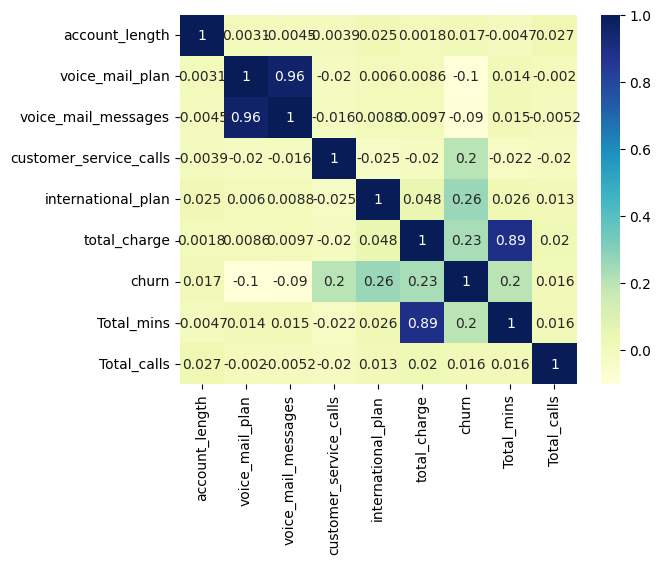

In [85]:
# Plotting a correlation plot
sns.heatmap(df_final.corr(), cmap="YlGnBu", annot=True)

#### Voice_mail_Plan and Voice_mail_messages have a Positive Correlation
#### Total_charges and Total_mins have a Positive Correlation

In [86]:
# Dropping Highly Correlated Columns
df_final.drop(columns=['voice_mail_messages','Total_mins'], inplace=True)

In [87]:
# Checking shape are dropping the correlated columns
df_final.shape

(3333, 7)

In [88]:
# Checking correlation after dropping highly correlated Datapoints.
df_final.corr()

,account_length,voice_mail_plan,customer_service_calls,international_plan,total_charge,churn,Total_calls
account_length,1.000000,0.003149,-0.003942,0.024800,0.001800,0.016547,0.027031
voice_mail_plan,0.003149,1.000000,-0.020161,0.006006,0.008629,-0.102148,-0.002025
customer_service_calls,-0.003942,-0.020161,1.000000,-0.025285,-0.020113,0.202947,-0.019619
international_plan,0.024800,0.006006,-0.025285,1.000000,0.047937,0.259852,0.013495
total_charge,0.001800,0.008629,-0.020113,0.047937,1.000000,0.231809,0.020051
churn,0.016547,-0.102148,0.202947,0.259852,0.231809,1.000000,0.015912
Total_calls,0.027031,-0.002025,-0.019619,0.013495,0.020051,0.015912,1.000000


<AxesSubplot: >

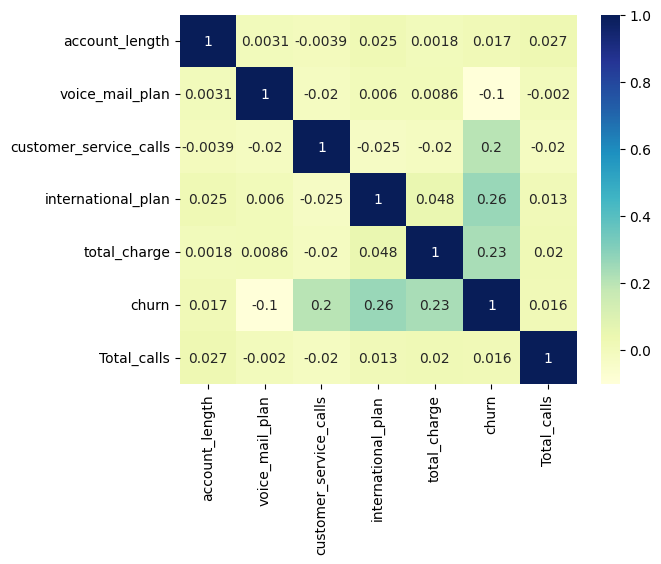

In [89]:
# Plotting a correlation plot after dropping highly correlated columns
sns.heatmap(df_final.corr(), cmap="YlGnBu", annot=True)

#### Upon checking the Data found that the datapoints are independent

In [90]:
df_final

,account_length,voice_mail_plan,customer_service_calls,international_plan,total_charge,churn,Total_calls
0,128.0,1.0,1.0,0,75.56,0,303.0
1,107.0,1.0,1.0,0,59.24,0,332.0
2,137.0,0.0,0.0,0,62.29,0,333.0
3,84.0,0.0,2.0,1,66.80,0,255.0
4,75.0,0.0,3.0,1,52.09,0,359.0
...,...,...,...,...,...,...,...
3328,192.0,1.0,2.0,0,60.10,0,292.0
3329,68.0,0.0,3.0,0,63.53,0,239.0
3330,28.0,0.0,2.0,0,67.74,0,264.0
3331,184.0,0.0,2.0,1,57.53,0,336.0


### Model Building

In [91]:
# Creating X and y Variables
X = df_final.drop(columns=['churn'])
y = df_final.churn

In [92]:
from sklearn.preprocessing import StandardScaler

In [93]:
# Scaling the Data using Standard Scaler
Scaled = StandardScaler()

In [94]:
X_scaled = Scaled.fit_transform(X)

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=.20, shuffle=True, random_state=40)

In [97]:
y_train.value_counts()

0    2272
1     394
Name: churn, dtype: int64

In [98]:
y_test.value_counts()

0    578
1     89
Name: churn, dtype: int64

In [99]:
# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

C:\Users\abhil\miniconda3\envs\Tensorflow\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [100]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('XGB', xgb.XGBClassifier()))
models.append(('RFC', RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

C:\Users\abhil\miniconda3\envs\Tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\abhil\miniconda3\envs\Tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

LR: 0.858669 (0.022770)
KNN: 0.861968 (0.026621)
DTC: 0.909092 (0.015999)
SVM: 0.855072 (0.026752)
[11:46:48] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\abhil\miniconda3\envs\Tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\abhil\miniconda3\envs\Tensorflow\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\abhil\miniconda3\envs\Tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the foll

[11:46:48] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\abhil\miniconda3\envs\Tensorflow\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\abhil\miniconda3\envs\Tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:46:48] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\abhil\miniconda3\envs\Tensorflow\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\abhil\miniconda3\envs\Tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\abhil\miniconda3\envs\Tensorflow\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype inste

[11:46:48] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:46:49] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\abhil\miniconda3\envs\Tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\abhil\miniconda3\envs\Tensorflow\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\abhil\miniconda3\envs\Tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the foll

[11:46:49] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:46:49] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\abhil\miniconda3\envs\Tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\abhil\miniconda3\envs\Tensorflow\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\abhil\miniconda3\envs\Tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the foll

[11:46:49] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:46:49] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\abhil\miniconda3\envs\Tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\abhil\miniconda3\envs\Tensorflow\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11:46:49] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB: 0.939093 (0.014085)
RFC: 0.942990 (0.012615)


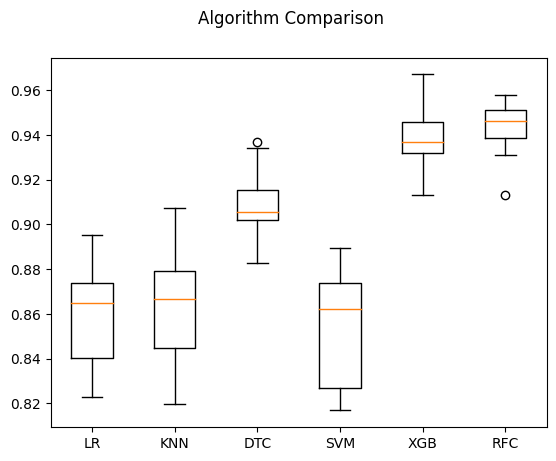

In [101]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### Building different Machine Learning has resulted in 
#### 85% accuracy for Logistic Regression
#### 86% accuracy for KNN
#### 90% accuracy for DTC
#### 86% accuracy for SVM
#### 94% accuracy for XGBoost
#### 94% accuracy for RandomForest

## Hyperparameter Tunning

In [102]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [103]:
classifier = xgb.XGBClassifier()

In [104]:
params = {
 "learning_rate" : [0.05,0.10,0.15,0.20,0.25,0.30],
 "max_depth" : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

In [105]:
rs_model=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,cv=5,verbose=3)

In [106]:
rs_model.fit(X,y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[11:46:53] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1;, score=0.871 total time=   0.0s
[11:46:53] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1;, score=0.879 total time=   0.0s
[11:46:53] WARNING: C:\Win

C:\Users\abhil\miniconda3\envs\Tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\abhil\miniconda3\envs\Tensorflow\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\abhil\miniconda3\envs\Tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the foll

[CV 3/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1;, score=0.874 total time=   0.0s
[11:46:53] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1;, score=0.872 total time=   0.0s
[11:46:53] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=4, min_chil

C:\Users\abhil\miniconda3\envs\Tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\abhil\miniconda3\envs\Tensorflow\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\abhil\miniconda3\envs\Tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the foll

[CV 1/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.25, max_depth=5, min_child_weight=3;, score=0.945 total time=   0.0s
[11:46:53] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.25, max_depth=5, min_child_weight=3;, score=0.931 total time=   0.0s
[11:46:54] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\abhil\miniconda3\envs\Tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\abhil\miniconda3\envs\Tensorflow\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\abhil\miniconda3\envs\Tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the foll

[CV 3/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.25, max_depth=5, min_child_weight=3;, score=0.949 total time=   0.0s
[11:46:54] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.25, max_depth=5, min_child_weight=3;, score=0.938 total time=   0.0s
[11:46:54] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.25, max_depth=5, min_c

C:\Users\abhil\miniconda3\envs\Tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\abhil\miniconda3\envs\Tensorflow\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\abhil\miniconda3\envs\Tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the foll

[11:46:54] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=7;, score=0.927 total time=   0.0s
[11:46:54] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=7;, score=0.915 total time=   0.0s
[11:46:54] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_16595

C:\Users\abhil\miniconda3\envs\Tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\abhil\miniconda3\envs\Tensorflow\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\abhil\miniconda3\envs\Tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the foll

[CV 1/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.25, max_depth=12, min_child_weight=3;, score=0.940 total time=   0.1s
[11:46:55] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.25, max_depth=12, min_child_weight=3;, score=0.933 total time=   0.1s
[11:46:55] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\abhil\miniconda3\envs\Tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\abhil\miniconda3\envs\Tensorflow\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\abhil\miniconda3\envs\Tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the foll

[CV 3/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.25, max_depth=12, min_child_weight=3;, score=0.946 total time=   0.1s
[11:46:55] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.25, max_depth=12, min_child_weight=3;, score=0.944 total time=   0.1s
[11:46:55] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\abhil\miniconda3\envs\Tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\abhil\miniconda3\envs\Tensorflow\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\abhil\miniconda3\envs\Tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the foll

[CV 5/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.25, max_depth=12, min_child_weight=3;, score=0.947 total time=   0.1s
[11:46:55] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.3, max_depth=12, min_child_weight=5;, score=0.904 total time=   0.0s
[11:46:55] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.3, max_depth=12, min_

C:\Users\abhil\miniconda3\envs\Tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\abhil\miniconda3\envs\Tensorflow\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\abhil\miniconda3\envs\Tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the foll

[11:46:55] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.3, max_depth=12, min_child_weight=5;, score=0.909 total time=   0.0s
[11:46:55] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.3, max_depth=12, min_child_weight=5;, score=0.916 total time=   0.0s


C:\Users\abhil\miniconda3\envs\Tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\abhil\miniconda3\envs\Tensorflow\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\abhil\miniconda3\envs\Tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the foll

[11:46:56] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.3, max_depth=12, min_child_weight=5;, score=0.917 total time=   0.0s
[11:46:56] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints...
                                           predictor=None, random_state=None,
                                           reg_alpha=None, reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=None, tree_method=None,
                                           validate_parameters=None,
                                           verbosity=None),
                   n_iter=5,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   verbose=3)

In [107]:
rs_model.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=0.4, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=5,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [108]:
rs_model.cv_results_

{'mean_fit_time': array([0.06346245, 0.10000286, 0.0783917 , 0.1624342 , 0.10141864]),
 'std_fit_time': array([0.00274134, 0.00549227, 0.00418981, 0.01218651, 0.00961592]),
 'mean_score_time': array([0.00400891, 0.00370212, 0.00390792, 0.00410805, 0.00380549]),
 'std_score_time': array([0.00031718, 0.00039974, 0.0008659 , 0.00037659, 0.00051242]),
 'param_min_child_weight': masked_array(data=[1, 3, 7, 3, 5],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[4, 5, 4, 12, 12],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_learning_rate': masked_array(data=[0.1, 0.25, 0.05, 0.25, 0.3],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_gamma': masked_array(data=[0.1, 0.4, 0.1, 0.2, 0.0],
              mask=[False, False, False, False, False],
        fill_value

In [109]:
results = pd.DataFrame(rs_model.cv_results_)[['params','mean_test_score','rank_test_score']]

In [110]:
results.sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
1,"{'min_child_weight': 3, 'max_depth': 5, 'learn...",0.942996,1
3,"{'min_child_weight': 3, 'max_depth': 12, 'lear...",0.942097,2
2,"{'min_child_weight': 7, 'max_depth': 4, 'learn...",0.926195,3
4,"{'min_child_weight': 5, 'max_depth': 12, 'lear...",0.907896,4
0,"{'min_child_weight': 1, 'max_depth': 4, 'learn...",0.875188,5


In [111]:
model = rs_model.best_estimator_

In [112]:
model.fit(X_train, y_train)

[11:46:56] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\abhil\miniconda3\envs\Tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=0.4, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=5,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [113]:
pred = model.predict(X_test)

In [114]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [115]:
confusion_matrix(y_test, pred)

array([[569,   9],
       [ 31,  58]], dtype=int64)

C:\Users\abhil\miniconda3\envs\Tensorflow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


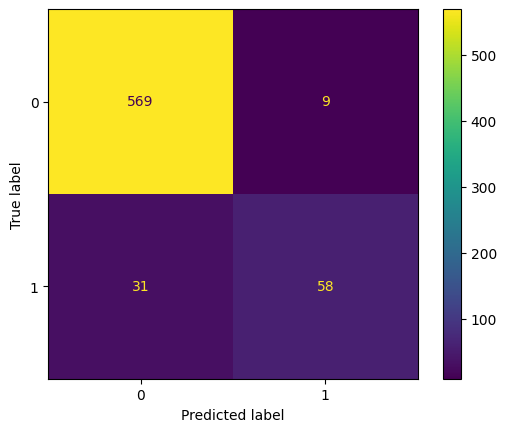

In [116]:
plot_confusion_matrix(model, X_test, y_test)

In [117]:
from sklearn.metrics import classification_report

In [118]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       578
           1       0.87      0.65      0.74        89

    accuracy                           0.94       667
   macro avg       0.91      0.82      0.85       667
weighted avg       0.94      0.94      0.94       667



#### Building a model using Xgboost has resulted in 94% accuracy

In [119]:
classifier1 = RandomForestClassifier()

In [120]:
params = {
 "n_estimators" : [50,100,150,200,250,300],
 "criterion" : [ 'gini', 'entropy'],
 "max_depth" : [ 3,4,5,6,7],
 "min_samples_split": [ 2,3,4,5,6,7,8]
}

In [121]:
rsv_model1=RandomizedSearchCV(classifier1, param_distributions= params, cv=10, verbose=5, return_train_score=True)

In [122]:
rsv_model1.fit(X, y)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END criterion=entropy, max_depth=6, min_samples_split=8, n_estimators=200;, score=(train=0.951, test=0.955) total time=   0.5s
[CV 2/10] END criterion=entropy, max_depth=6, min_samples_split=8, n_estimators=200;, score=(train=0.952, test=0.946) total time=   0.4s
[CV 3/10] END criterion=entropy, max_depth=6, min_samples_split=8, n_estimators=200;, score=(train=0.952, test=0.943) total time=   0.5s
[CV 4/10] END criterion=entropy, max_depth=6, min_samples_split=8, n_estimators=200;, score=(train=0.954, test=0.934) total time=   0.5s
[CV 5/10] END criterion=entropy, max_depth=6, min_samples_split=8, n_estimators=200;, score=(train=0.951, test=0.955) total time=   0.4s
[CV 6/10] END criterion=entropy, max_depth=6, min_samples_split=8, n_estimators=200;, score=(train=0.952, test=0.949) total time=   0.5s
[CV 7/10] END criterion=entropy, max_depth=6, min_samples_split=8, n_estimators=200;, score=(train=0.952, test=0.94

[CV 1/10] END criterion=entropy, max_depth=5, min_samples_split=4, n_estimators=300;, score=(train=0.951, test=0.955) total time=   0.6s
[CV 2/10] END criterion=entropy, max_depth=5, min_samples_split=4, n_estimators=300;, score=(train=0.951, test=0.949) total time=   0.6s
[CV 3/10] END criterion=entropy, max_depth=5, min_samples_split=4, n_estimators=300;, score=(train=0.952, test=0.943) total time=   0.7s
[CV 4/10] END criterion=entropy, max_depth=5, min_samples_split=4, n_estimators=300;, score=(train=0.954, test=0.934) total time=   0.7s
[CV 5/10] END criterion=entropy, max_depth=5, min_samples_split=4, n_estimators=300;, score=(train=0.951, test=0.955) total time=   0.7s
[CV 6/10] END criterion=entropy, max_depth=5, min_samples_split=4, n_estimators=300;, score=(train=0.951, test=0.949) total time=   0.7s
[CV 7/10] END criterion=entropy, max_depth=5, min_samples_split=4, n_estimators=300;, score=(train=0.952, test=0.949) total time=   0.6s
[CV 8/10] END criterion=entropy, max_dept

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300]},
                   return_train_score=True, verbose=5)

In [123]:
rsv_model1.best_score_

0.9492960025894158

In [124]:
rsv_model1.cv_results_

{'mean_fit_time': array([0.54028549, 0.11792274, 0.11502316, 0.3058562 , 0.26296003,
        0.1252841 , 0.72244761, 0.51417434, 0.19955194, 0.68596771]),
 'std_fit_time': array([0.01791941, 0.00502874, 0.00345295, 0.01020603, 0.00872745,
        0.00429205, 0.01776023, 0.00976189, 0.00290701, 0.00706282]),
 'mean_score_time': array([0.02555907, 0.00807502, 0.00760901, 0.01891289, 0.01173892,
        0.00749691, 0.03745887, 0.02520368, 0.0148438 , 0.02990744]),
 'std_score_time': array([0.00229941, 0.00098421, 0.00101822, 0.00475325, 0.0050183 ,
        0.0015688 , 0.00148757, 0.00197563, 0.00231972, 0.00141421]),
 'param_n_estimators': masked_array(data=[200, 50, 50, 150, 100, 50, 300, 200, 100, 250],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array(data=[8, 5, 6, 2, 8, 2, 4, 5, 8, 2],
              mask=[False, False, False, False,

In [125]:
results1 = pd.DataFrame(rsv_model1.cv_results_)[['params','mean_test_score','mean_train_score','rank_test_score']]

In [126]:
results1.sort_values('rank_test_score')

,params,mean_test_score,mean_train_score,rank_test_score
3,"{'n_estimators': 150, 'min_samples_split': 2, ...",0.949296,0.951195,1
6,"{'n_estimators': 300, 'min_samples_split': 4, ...",0.949295,0.951362,2
0,"{'n_estimators': 200, 'min_samples_split': 8, ...",0.948996,0.951862,3
5,"{'n_estimators': 50, 'min_samples_split': 2, '...",0.948995,0.951528,4
1,"{'n_estimators': 50, 'min_samples_split': 5, '...",0.948695,0.951462,5
4,"{'n_estimators': 100, 'min_samples_split': 8, ...",0.948695,0.951895,5
7,"{'n_estimators': 200, 'min_samples_split': 5, ...",0.948394,0.952162,7
8,"{'n_estimators': 100, 'min_samples_split': 8, ...",0.948095,0.950562,8
9,"{'n_estimators': 250, 'min_samples_split': 2, ...",0.947795,0.955062,9
2,"{'n_estimators': 50, 'min_samples_split': 6, '...",0.944501,0.947695,10


In [127]:
rsv_model1.best_estimator_

RandomForestClassifier(max_depth=4, n_estimators=150)

In [128]:
model_RFC = rsv_model1.best_estimator_

In [129]:
model_RFC.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, n_estimators=150)

In [130]:
pred1 = model_RFC.predict(X_test)

In [131]:
# XGboost Classification Report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       578
           1       0.87      0.65      0.74        89

    accuracy                           0.94       667
   macro avg       0.91      0.82      0.85       667
weighted avg       0.94      0.94      0.94       667



In [132]:
#Random Forest Model Classification Report
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       578
           1       1.00      0.64      0.78        89

    accuracy                           0.95       667
   macro avg       0.97      0.82      0.88       667
weighted avg       0.95      0.95      0.95       667



#### Building a model with Random Forest Classifier resulted in an accuracy of 95%

### Creating a pickle file

In [133]:
#import pickle

In [134]:
#with open('model_pickle', 'wb') as f:
    #pickle.dump(model_RFC, f)

In [135]:
#with open('model_pickle', 'rb') as f:
    #mp = pickle.load(f)

## Conclusion

In [140]:
df_final.to_csv('file1.csv')